In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
from matplotlib import pyplot as plt


In [2]:
match=pd.read_csv('matches.csv')
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
dele=pd.read_csv('deliveries.csv')
dele.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#find the total runs scored in all the innings of all match
total_score_df=dele.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [5]:
total_score_df=total_score_df[total_score_df['inning']==1]
print(total_score_df)

      match_id  inning  total_runs
0            1       1         207
2            2       1         184
4            3       1         183
6            4       1         163
8            5       1         157
...        ...     ...         ...
1518     11347       1         143
1520     11412       1         136
1522     11413       1         171
1524     11414       1         155
1526     11415       1         152

[756 rows x 3 columns]


In [6]:
#merge the total run and match id from this dataframe to the match dataframe

match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


# data preprocessing

take only those teams which are playing today

In [7]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians',
     'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals']

In [9]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [10]:
match_df.shape

(437, 20)

remove matches with duckward lewis

In [11]:
dl_method=match_df['dl_applied']
dl_method.value_counts()

dl_applied
0    427
1     10
Name: count, dtype: int64

In [12]:
match_df=match_df[dl_method==0]
match_df['dl_applied'].value_counts()

dl_applied
0    427
Name: count, dtype: int64

preparing the final dataset

In [13]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [14]:
new_df=match_df.merge(dele,on='match_id')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102143 entries, 0 to 102142
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          102143 non-null  int64 
 1   city              100937 non-null  object
 2   winner            101964 non-null  object
 3   total_runs_x      102143 non-null  int64 
 4   inning            102143 non-null  int64 
 5   batting_team      102143 non-null  object
 6   bowling_team      102143 non-null  object
 7   over              102143 non-null  int64 
 8   ball              102143 non-null  int64 
 9   batsman           102143 non-null  object
 10  non_striker       102143 non-null  object
 11  bowler            102143 non-null  object
 12  is_super_over     102143 non-null  int64 
 13  wide_runs         102143 non-null  int64 
 14  bye_runs          102143 non-null  int64 
 15  legbye_runs       102143 non-null  int64 
 16  noball_runs       102143 non-null  int

In [15]:
new_df=new_df[new_df['inning']==2]

In [16]:

# Check the data type of 'total_runs_y' column
print(new_df['total_runs_y'].dtype)

# Replace NaN values with 0
new_df['total_runs_y'] = new_df['total_runs_y'].fillna(0)

# Convert the column to a numeric data type
new_df['total_runs_y'] = pd.to_numeric(new_df['total_runs_y'], errors='coerce')

# Calculate cumulative sum of 'total_runs_y' grouped by 'match_id'
new_df['current_score'] = new_df.groupby('match_id')['total_runs_y'].cumsum()


int64


In [17]:
#make a new column for the second inning current score ball by ball

new_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102138,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
102139,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
102140,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
102141,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [18]:
#make columns for runs left
new_df['runs_left']=new_df['total_runs_x']-new_df['current_score']+1
pd.set_option('display.max_columns', None)
new_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102138,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,152,1
102139,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,154,-1
102140,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
102141,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [19]:
#1 over extra added in the beginning
new_df['balls_left']=126-(new_df['over']*6+new_df['ball'])
new_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102138,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,152,1,4
102139,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,154,-1,3
102140,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
102141,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,157,-4,1


find the wickets left after each ball

In [20]:
#fill the nan with 0 and rest with 1
new_df['player_dismissed'] = new_df['player_dismissed'].fillna("0")
new_df['player_dismissed'] = new_df['player_dismissed'].apply(lambda x:x if x =="0" else "1")

new_df['player_dismissed'] = new_df['player_dismissed'].astype(int)

wickets=new_df.groupby('match_id')['player_dismissed'].cumsum()
new_df['wickets_left']=10-wickets
new_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
102138,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,0,NaN,NaN,152,1,4,5
102139,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,0,NaN,NaN,154,-1,3,5
102140,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,1,run out,KH Pandya,155,-2,2,4
102141,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,0,NaN,NaN,157,-4,1,4
102142,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,1,lbw,NaN,157,-4,0,3


current run rate crr=runs/over

In [21]:
new_df['crr']=new_df['current_score']/(120-new_df['balls_left'])*6
new_df['req_rr']=new_df['runs_left']/ new_df['balls_left']*6   
new_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,req_rr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


check if batting team is winner then 1 else 0

In [22]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

new_df['result']=new_df.apply(result,axis=1)
new_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,req_rr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


all datapreprocessing done now take the required columns


In [23]:
final_df=new_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','req_rr','crr','result']]
final_df.sample(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,req_rr,crr,result
58646,Rajasthan Royals,Mumbai Indians,Ahmedabad,69,18,3,178,23.000000,6.470588,0
24510,Chennai Super Kings,Kolkata Knight Riders,Chennai,73,85,9,139,5.152941,11.485714,1
10440,Mumbai Indians,Kings XI Punjab,Mumbai,101,61,8,189,9.934426,9.050847,0
22868,Rajasthan Royals,Chennai Super Kings,Chennai,88,34,8,246,15.529412,11.093023,0
14340,Rajasthan Royals,Chennai Super Kings,Centurion,74,36,6,164,12.333333,6.500000,0


In [24]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            589
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
req_rr            5
crr               0
result            0
dtype: int64

In [25]:
final_df.dropna(inplace=True)

C:\Users\BISHNU KANTA\AppData\Local\Temp\ipykernel_25988\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [26]:
final_df=final_df[final_df['balls_left']!=0]

DATAFRAME IS COMPLETELY READY 

# now use model selection and training  

In [27]:
x=final_df.drop("result",axis='columns')
y=final_df['result']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


one hot encoding for the string columns

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    transformers=[
        ('batting_team', OneHotEncoder(sparse=False, drop='first'), ['batting_team']),
        ('bowling_team', OneHotEncoder(sparse=False, drop='first'), ['bowling_team']),
        ('city', OneHotEncoder(sparse=False, drop='first'), ['city'])
    ],
    remainder='passthrough'
)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe=Pipeline(steps=[('steps1',trf),('step2',LogisticRegression(solver='liblinear'))])


In [30]:
x_train.describe()

,runs_left,balls_left,wickets_left,total_runs_x,req_rr,crr
count,39037.000000,39037.000000,39037.000000,39037.000000,39037.000000,39037.000000
mean,94.891334,62.745677,7.574839,167.520045,10.803712,7.485691
std,50.522212,33.318950,2.133738,29.601152,15.125840,2.309635
min,-15.000000,-2.000000,0.000000,65.000000,-516.000000,0.000000
25%,55.000000,35.000000,6.000000,148.000000,7.324675,6.276923
50%,94.000000,63.000000,8.000000,168.000000,9.107143,7.500000
75%,132.000000,92.000000,9.000000,187.000000,11.217391,8.769231
max,243.000000,119.000000,10.000000,250.000000,684.000000,42.000000


In [31]:
pipe.fit(x_train,y_train)

C:\Users\BISHNU KANTA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\BISHNU KANTA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\BISHNU KANTA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('batting_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team']),
                                                 ('bowling_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bowling_team']),
                                                 ('city',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [32]:
y_pred=pipe.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.798155737704918

In [34]:
pipe.predict_proba(x_test)[3]

array([0.29581929, 0.70418071])

In [35]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [36]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'req_rr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    # Get the wickets_left column as a list

    wickets = list(temp_df['wickets_left'].values)

# Calculate the number of wickets lost in each over (starting from the 6th ball)
    wickets_in_over = [wickets[i] - wickets[i - 1] for i in range(1, len(wickets))]
    
# The first ball will have 0 wickets lost
    wickets_in_over.insert(0, 0)

# Update the wickets_in_over column in temp_df
    temp_df['wickets_in_over'] = wickets_in_over

  

    print("Target -", target)
    print("Length of wickets:", len(wickets))
    print("Length of new_wickets:", len(wickets) + 1)

    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [37]:
temp_df,target = match_progression(new_df,69,pipe)
temp_df####OVER BY OVER DETAILS

Target - 182
Length of wickets: 19
Length of new_wickets: 20


,end_of_over,runs_after_over,wickets_in_over,lose,win
6070,1,1,0,70.1,29.9
6076,2,12,0,61.0,39.0
6083,3,4,-2,85.9,14.1
6089,4,3,0,86.8,13.2
6096,5,13,0,80.6,19.4
6102,6,5,0,80.1,19.9
6108,7,6,0,78.8,21.2
6115,8,15,0,67.9,32.1
6122,9,5,-1,80.1,19.9
6128,10,2,-1,90.1,9.9


# SAME MATCH PROGRESS INTO GRAPH

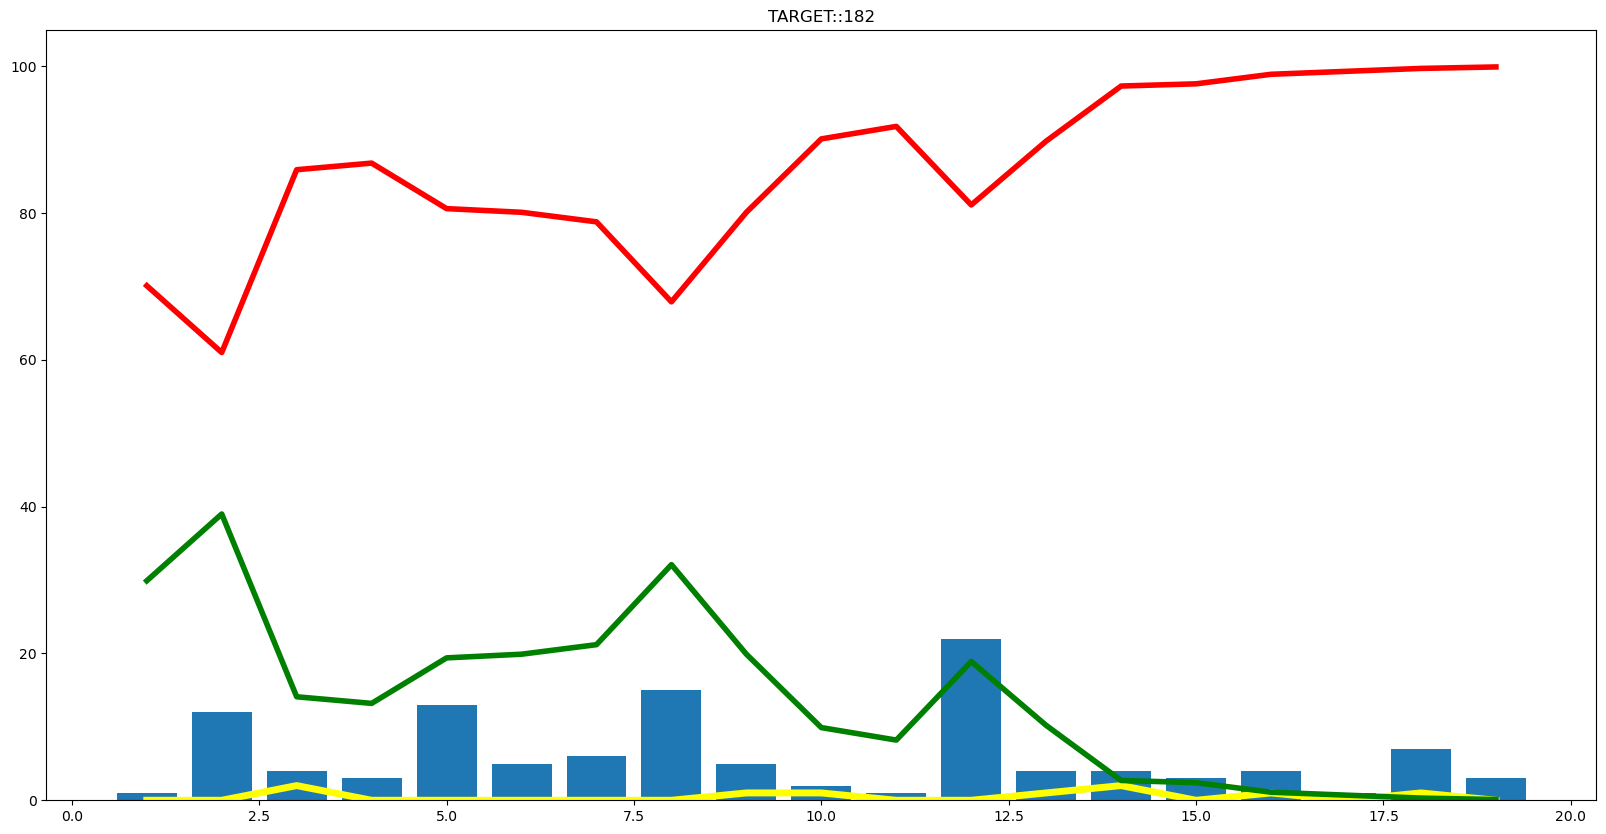

In [38]:
from matplotlib import pyplot as pl
pl.figure(figsize=(20,10))
pl.plot(temp_df['end_of_over'],abs(temp_df['wickets_in_over']),color='yellow',linewidth=5)
pl.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
pl.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
pl.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
pl.title('TARGET::'+str(target))    
pl.show()


# almost done now presentation

In [39]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [40]:
new_df['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Ahmedabad', 'Dharamsala', 'Ranchi', 'Delhi', 'Abu Dhabi', nan,
       'Sharjah', 'Cuttack', 'Pune', 'Visakhapatnam', 'Bengaluru',
       'Mohali'], dtype=object)

In [41]:
import pickle

# Load the pickled model
with open('pipe.pkl', 'rb') as model_file:
    loaded_pipe = pickle.load(model_file)

print("Model loaded successfully:", loaded_pipe)


Model loaded successfully: Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('batting_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team']),
                                                 ('bowling_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bowling_team']),
                                                 ('city',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city'])])),
                ('step2

In [42]:
import os
import pickle

# Get the current working directory
current_dir = os.getcwd()

# Set the path to the pickle file (assuming it's in the same directory)
pickle_file_path = os.path.join(current_dir, 'pipe.pkl')

# Load the pickled model
with open(pickle_file_path, 'rb') as model_file:
    loaded_pipe = pickle.load(model_file)

print("Model loaded successfully:", loaded_pipe)



Model loaded successfully: Pipeline(steps=[('steps1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('batting_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team']),
                                                 ('bowling_team',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bowling_team']),
                                                 ('city',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city'])])),
                ('step2

In [43]:
import pickle
# Pickle the model and pipeline
with open('pipe.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)
